<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Primer_diff_enacbe_analiticno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeri uporabe simbolnega računa za analitičen izračun prehodnega pojava

Prikazali bomo primer uporabe knjižnice Sympy za analitičen izračun diferencialne enačbe prvega reda za nekaj primerov RLC vezij.Pri tem bomo v vsakem primeru pokazali malo drugačen način reševanja ali izrisa rešitve.


<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika.
</div>

***
## Vklop zaporedne vezave kondenzatorja in upora na enosmerni napetostni vir 
Rešujemo diferencialno enačbo $R\frac{\text{d}i}{\text{d}t}+\frac{i}{C}=0$.

Najprej vnesemo potrebne knjižnice: 

In [0]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
#matplotlib inline 
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():  # Te vrstice so potrebne, da se izpišejo enačbe. Potrebno le za Colab 
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)
import sympy
sympy.init_printing()
init_printing(use_latex=True)

Pripravimo spremenljivke, tvorimo enačbo in jo rešimo.

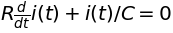

In [0]:
var('R C t C1 a Ug') # priprava spremenljivk
i = Function("i")(t) # funkcija toka

de = Eq(i/C+R*i.diff(t)) # zapis diferencialne enačbe
display(de) # izpis enačbe
des = dsolve(de,i) # rešitev enačbe
display(des) # izpis rešitve


Rešitev diferencialne enačbe je ustrezna, le iz začetnega pogoja je potrebno še določiti konstanto $C_1$. Ta mora izhajati iz pogoja $u_C(t=0^+)=u_C(t=0^-)$. Torej mora biti napetost na kondezatorju ob preklopu enaka nič. Ker mora biti hkrati zadoščeno 2. Kirchoffovemu zakonu, mora biti napetost generatorja ob preklopu enaka napetosti na uporu $u_g(t=0)=U_g=u_R(t=0)=R i(t=0)$ in torej $i(t=0)=U_g/R$.

V tem primeru bomo to upoštevali "ročno", tako, da bomo sami preuredili rešitev enačbe, saj lahko člen $e^{C_1} $ zapišemo z novo konstanto $a$, torej lahko tvorimo enačbo $i(t)=a e^{\frac{-t}{RC}}$. V ta namen bomo uporabili funkcijo $Lambda$. 

Ker je $i(t=0)= a$, je $a=U_g/R$. S tem smo prišli do končne oblike rešitve.

In [0]:
des = des.subs(C1,0) # za C1 vstavimo 0 in nato s funkcijo Lambda spremenimo rešitev v bolj praktično obliko
display(des)

f = Lambda((t,R,C,a),(a* des.rhs)) # ki je a*(desna stran enačbe - rhs=right hand side)
#a=Ug/R # a je očitno tok ob času t=0, ki je enak Ug/R
display(f(t,R,C,Ug/R))
# display(Latex('$i(t) = ' + str(latex(f(t,R,C,Ug/R))) + '$')) # izpišemo rešitev z uporabo Latex sintakse, ne dela v Colabu

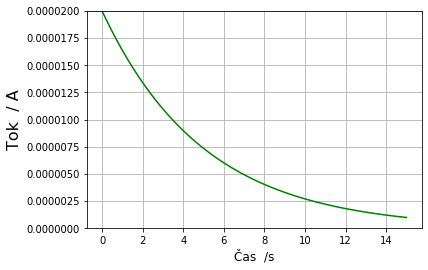

In [0]:
#Pripravimo za iziris

x = np.linspace(0,15,100)  # niz vrednosti za x-os - čas
R=1e5
C=5e-5
Ug=2
plt.grid(True)
plt.xlabel('Čas  /s',fontsize=12)
plt.ylabel('Tok  / A',fontsize=16)
plt.plot(x,[f(t,R,C,Ug/R) for t in x],color='#008000') # ob izrisu vstavimo vrednosti za R, C in a=Ug/R (1,4,1)
plt.ylim(0,2e-5)
plt.show()

### Opravi naslednje analize:
1. Spreminjaj vrednost kapacitivnosti in opazuj razliko v odzivu. (Ob spremembi vrednosti zaženeš celico s Shift-Enter ali klikom na ikono.
2. Spreminjaj vrednost upora in opazuj spremembe. Upornost ne spremeni le naklona odziva pač pa tudi največjo vrednost. Spremeni vrstico kode, ki določa max vrednost ordinate tako, da bo krivulja vedno ustrezno prikazana.

<b> Še mali programerski izziv: Spremeni kodo tako, da bo max vrednost abscisne osi vedno enaka 5*R*C (5* časovna konstanta).

***
## Vklop tuljave

Rešujemo enačbo ${{U}_{g}}={{u}_{R}}(t)+{{u}_{L}}(t)=iR+L\frac{\text{d}i}{\text{d}t}$.
V tem primeru bomo preuredili rešitev tako, da bo možno neposredno uporabiti začetni pogoj, ki je $i(t=0)=0$.

Najprej zapišemo enačbo v obliki $ L \frac{\text{d}i}{\text{d}t} ={{U}_{g}}-i R$ in nato poiščemo njeno rešitev.



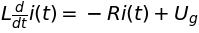

In [0]:
i = Function("i") # pripravimo funkcijo in spremenljivke ter zapišemo dif enačbo
L, R, Ug, t, i0, C1 = symbols('L, R, U_g, t, i0 C1')
eq = Eq(L*i(t).diff(t,1),  Ug-R*i(t))
display(eq)

In [0]:
dsol = dsolve(eq, i(t))  # rešimo diff enačbo
display(dsol)

Sedaj se želimo "znebiti" konstante $C_1$ in izraziti enačbo z začetnim pogojem, t.j. $i(t=0^+)=0$.

To naredimo tako, da izrazimo enačbo za čas $t=0$ in jo rešimo za $C_1$.

In [0]:
it0=dsol.subs({'t':0})
display(it0)

init_solve=solve(it0, C1) # rešimo enačbo za C1

display(init_solve)  # prikažemo rešitev

In [0]:
final = dsol.subs(C1, init_solve[0]) # v rešitev vstavimo C1 in dobimo končno enačbo
final

In [0]:
expand(final)  # drugačen izpis

Vstavimo začetni pogoj $i(t=0^+)=i_0=0$ in dobimo končno obliko:

In [0]:
zacetni_pogoji = {i(0): 0}
i2=final.subs(zacetni_pogoji)
simplify(i2)

Poiščemo še rešitev za napetost z odvajanjem toka (desne strani enačbe i2) in množenjem z induktivnostjo L.

In [0]:
u2=symbols('u2')
u2=L*i2.rhs.diff(t) # množenje z L in odvodom desne strani enačbe
expand(u2)

### Pripravimo enačbe za izračune

Pripravimo podatke in uporabimo funkcijo "lambdify" za pretvorbo iz simbolnega zapisa v numeričnega.

In [0]:
podatki = {L: 1e-3,C: 1e-5,R: 2, Ug:3} 
tau=L/R  # časovna konstanta
tau2=tau.subs(podatki)  # numeričen izračun časovne konstante z zamenjavo oz. vstavitvijo vrednosti za L in R
print('Tau = ',tau2,' s')
print(podatki)
tok = lambdify(t, i2.args[1].subs(podatki), 'numpy') # tok kot funkcija časa
napetost = lambdify(t,u2.subs(podatki), 'numpy')  # napetost kot funkcija časa


print('Tok pri 0s: {:g} A'.format(tok(0)))
print('Napetost pri 0s: {:g} V'.format(napetost(0)))


Tau =  0.000500000000000000  s
{L: 0.001, 5e-05: 1e-05, R: 2, U_g: 3}
Tok pri 0s: 0 A
Napetost pri 0s: 3 V


Sledi priprava enačb za izrise. Naredimo dva niza: cas za izpis gladke krivulje z več točkami in cas2 za izris simbolov v redkih točkah:

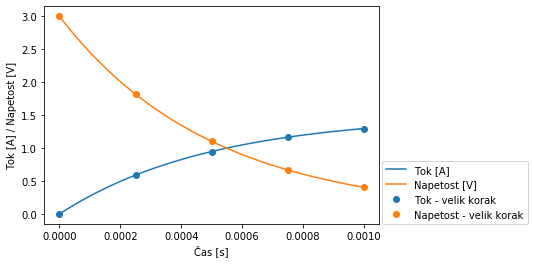

In [0]:
cas = np.linspace(0, 1e-3, 100)
cas2 = np.linspace(0, 1e-3, 5)

def slika():
    plt.plot(cas, tok(cas), 'C0', label='Tok [A]')
    plt.plot(cas, napetost(cas), 'C1', label='Napetost [V]')
    plt.plot(cas2, tok(cas2), 'C0o', label='Tok - velik korak')
    plt.plot(cas2, napetost(cas2), 'C1o', label='Napetost - velik korak')
    plt.xlabel('Čas [s]')
    plt.ylabel('Tok [A] / Napetost [V]')
    plt.legend(loc=(1.01, 0));
    plt.show()
slika()

### Opravi naslednje analize:
1. Kako vpliva velikost upora in tuljave na odziv? 
2. Ali oba vplivata na enak način?

<b> Še mali programerski izziv za zagnane: Dodaj vrstice kode, s katerimi bi določil časovno konstanto iz analize signala. Npr. tako, da poiščeš čas, ko znaša napetost  $u(t=\tau) = U_g e^{-1}$. </b> (Namig za en način: 1. tvori niz vrednosti napetosti (kot je narejeno v plotu). 2. izračunaj vrednost napetosti pri $\tau = RC$. To napetost moraš poiskati v nizu oziroma vrednost, ki je njej najbližje. 3. V ta namen uporabi funkcijo np.where, s katero poiščeš vrednosti večje ali manjše od določene vrednosti. Rezultat je niz vrednosti, ki zadostujejo temu pogoju. 4. Največja vrednost v nizu je tisti indeks, ki ga iščeš. 5.Sedaj le še vstaviš indeks v niz cas in imaš rešitev. Lažje reči kot narediti? Rešitev je na koncu strani.) (Namig za drugi način: Iz odvoda napetosti dobimo $\frac{du}{dt}=\frac{d}{dt} (  U_g  e^{-t/ \tau}) =- U_g/\tau e^{-t/ \tau}  $. Če torej izračunam odvod napetosti (numerično) in pogledamo njegovo vrednosti pri t=0, bo ta enaka $-U_g/ \tau$. Rešitev je na koncu strani).

***
## Vklop kondenzatorja na izmenični vir napetosti

Rešujemo enačbo ${{u}_{g}}=RC\frac{\text{d}{{u}_{C}}}{\text{d}t}+{{u}_{C}}$, 
kjer je ${{u}_{g}}(t)={{U}_{g}}\sin {(\omega t})$.

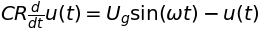

In [0]:
u = Function('u') # pripravimo funkcijo in spremenljivke ter zapišemo dif enačbo
C, R, t, Ug, omega, u0 = symbols('C, R, t, U_g, omega, u0')
eq = Eq(R*C*u(t).diff(t),  Ug*sin(omega*t)-u(t))
eq

Najprej poskušamo identificirati tip diferencialne enačbe. V ta namen uporabimo funkcijo classify_ode.

In [0]:
classify_ode(eq, u(t))

('1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

Preiskusimo lahko vse zgoraj naštete možne tipe. V našem primeru dobro deluje nth_linear_constant_coeff_undetermined_coefficients

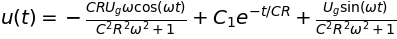

In [0]:
dsol = dsolve(eq, u(t),'nth_linear_constant_coeff_undetermined_coefficients')  # rešimo diff enačbo
display(dsol)

Podobno kot v prejšnjem primeru, zamenjamo konstanto $C_1$ za začetni pogoj, $u(t=0)$:

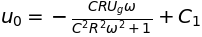

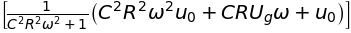

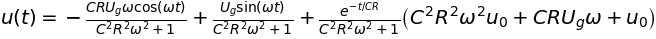

In [0]:
t0=dsol.args[1].subs({'t':0})
eq_init = Eq(u0, t0)  # izrazimo enačbo pri t=0
display(eq_init)  # prikažemo i0

init_solve=solve(eq_init, C1) # rešimo enačbo za C1

display(init_solve)  # prikažemo rešitev
final = dsol.subs(C1, init_solve[0]) # v rešitev vstavimo C1 in dobimo končno enačbo
final

Vstavimo začetni pogoj in dobimo končno rešitev:

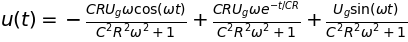

In [0]:
zacetni_pogoji = {'u0': 0}
u2=final.subs(zacetni_pogoji)
display((u2))

Izračunamo še tok kot $i=C\frac{\text{d}{{u}_{C}}}{\text{d}t}$

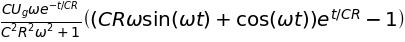

In [0]:
i2=symbols('i2')
i2=C*u2.rhs.diff(t) # množenje s C in odvodom desne strani enačbe
simplify(i2)

Sedaj lahko ocenimo še pravilnost enačbe. Čeprav je zapis zapleten, lahko ocenimo rešitev pri $CR\omega >>1$. Najprej izbrišemo 1 in $cos(ut)$, nato še eksponenta, ki se izničita. Ostane nam

$\frac{C U_g \omega }{C^{2} R^{2} \omega^{2}} \left(\left(C R \omega \sin{\left (\omega t \right )}\right) \right)$,

od koder sledi

$\frac{U_g }{R} \left(\left(\sin{\left (\omega t \right )}\right) \right)$,

kar je tok, ki ga diktira upornost $R$.

Če pa je $CR\omega << 1$, pa se ohrani cosinusni člen, eksponenta se za velike čase izničita, ostane 
$\frac{C U_g \omega }{C^{2} R^{2} \omega^{2}+1} \left(\left(\cos{\left (\omega t \right )}\right) \right)$ in nato 
$\frac{C \omega U_g}{1} \left(\left(\cos{\left (\omega t \right )}\right) \right)$. V tem primeru, npr. nizkih frekvencah, tok skozi vezje diktira "upornost" kondenzatorja, ki jo pri izmeničnih signalih imenujemo reaktanca in je enaka $\frac{1}{\omega C}$.  


In [0]:
podatki = {C: 1e-6, R: 5, Ug: 2, omega:2000} 
tau=R*C  # časovna konstanta
tau2=tau.subs(podatki)  # numeričen izračun konstante z zamenjavo oz. vstavitvijo vrednosti za L in R
print('Tau = ',tau2,' s')
print(podatki)
napetost = lambdify(t,u2.args[1].subs(podatki), 'numpy')  # napetost kot funkcija časa
tok = lambdify(t, i2.subs(podatki), 'numpy') # tok kot funkcija časa

print('Tok pri 0s: {:g} A'.format(tok(1)))
print('Napetost pri 0s: {:g} V'.format(napetost(1)))

Tau =  5.00000000000000e-6  s
{C: 1e-06, R: 5, U_g: 2, omega: 2000}
Tok pri 0s: -0.00143249 A
Napetost pri 0s: 1.86724 V


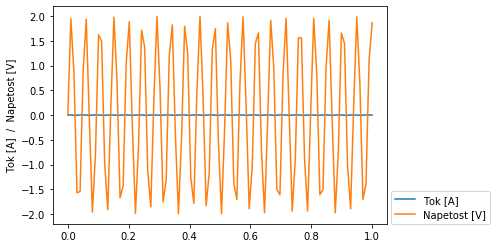

In [0]:
cas = np.linspace(0, 1, 100)

def slika():
    plt.plot(cas, tok(cas), 'C0', label='Tok [A]')
    plt.plot(cas, napetost(cas), 'C1', label='Napetost [V]')
    plt.ylabel('Tok [A]  /  Napetost [V]')
    plt.legend(loc=(1.01, 0));
    plt.show()
slika()

Zgornji prikaz ni napačen, problem je le, da sta lahko napetost in tok različnih velikostnih razredov. Zato je bolj primerno izrisati tok in napetost na dveh različnih grafih ali pa na enem grafu ampak z dvema različnima ordinatnima osema. Poleg tega časovni korak ni izbran najbolj ustrezno in ga je potrebno zgostiti". Iz podatkov izvlečemo \omega, izračunamo periodo ($\omega = 2 \pi f = 2\pi /T$) in naredimo časovni niz dolg nekaj period. Glej spodaj:

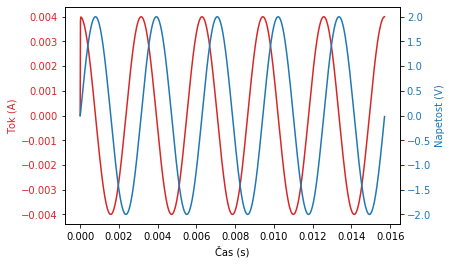

In [0]:
om=podatki.get(omega) # iz slovarja (dictionary) podatki izvlečem vrednosti omege
T_period=2*np.pi/om  # ena perioda
cas = np.linspace(0, 5*T_period, 1000)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Tok (A)', color=color)
ax1.plot(cas, tok(cas), color=color)
#ax1.set_ylim(-1e-3,1e-3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota

color = 'tab:blue'
ax2.set_ylabel('Napetost (V)', color=color)  
ax2.plot(cas, napetost(cas), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

### Opravi naslednje analize:
1. Kako vpliva velikost upora in kodenzatorja na odziv vezja (tok in napetost)? 
2. Ali oba vplivata na enak način?
3. Kako vpliva frekvenca na odziv vezja?
4. Kakšna bi bila oblika napetosti na uporu?
5. Zakaj sta tok in napetost na kondenzatorju zamaknjena na četrtino periode.

<b> Še mali programerski izziv za zagnane: iz oblike signalov toka in napetosti želimo ugotoviti za koliko sta zamaknjena v času </b> (Namig: 1. tvori niz vrednosti napetosti in toka (kot je narejeno v plotu). 2. uporabi funkcijo np.where, s katero poiščeš vrednosti npr. manjše od 0. Rezultat je niz vrednosti, ki zadostujejo temu pogoju. 3. Vzameš prva indeksa, ki predstavljata mesto, ko je prvič zadoščeno pogoju. 4. Razliko med tema indeksoma vneseš v niz cas in dobiš čas med signaloma. 5. Narediš razmerje med tem časom in časom ene periode in izpišeš.

***
## Še nekaj izzivov za nadebudne

1. V prvem primeru smo uporabili funkcijo Lambda za tvorjenje analitične enačbe. Na primer, vzemimo funkcijo  $i(t)=A e^{-t/\tau}sin(\omega t)$. Funkcijo zapišite, izpišite in izrišite v grafu za poljubne vrednosti $A, \tau, \omega$. Rešitev je na koncu zvezka.

2. Po vzoru primera vklopa tuljave zapiši diferencialno enačbo za izklop vira (na Ug=0) pri zaporedni vezavi upora in kodenzatorja. Kondenzator je ob izklopu polno naelektren. Reši enačbo in izriši rezultat. Rešitev je na koncu zvezka.

3. Zapiši funkcijo, ki izračuna $i(t)={I_0} e^{-t/\tau}$ in izriši več krivulj na enem grafu za različne vrednosti $\tau$.Rešitev je na koncu zvezka.



Več:
- o uporabi simbolnega računa:
    - https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/12-symbolic-computation.html
    -

### Rešitve programerskih **izzivov** 

In [0]:
#Rešitev programerskega izziva iskanja časovne konstante (prvi način):
# To celico skopiraj pod celico z vprašanjem in zaženi
# 1 niz vrednosti
nap=napetost(cas)   # naredi niz (array)
# 2 Max vrednost napetosti
Uge_1=np.max(nap) #np.exp(-1)  #Ug*exp(-1)
display(Uge_1) # 
# 3 Indeksi vrednosti, kjer je izpolnjen pogoj
xx=np.where(nap >= np.max(nap)*np.exp(-1))  # indeksi, kjer je pogoj izpolnjen
# print(xx)
# 4 Največja vrednost indeksa
x2=((np.max(xx))) 
# 5 Vnos indeksa v niz cas in izpis
print('Tau = % 6.6f s'% cas[x2])

Tau =  0.013947 s


In [0]:
#Rešitev programerskega izziva iskanja časovne konstante (drugi način):
# To celico skopiraj pod celico z vprašanjem in zaženi
diferenca=np.diff(nap)  # numeričen izračun defirence (razlika med sosednjimi napetostmi)
tau=-cas[1]/(3*diferenca[0])  # cas[1] je prva vrednost v nizu čas = dt; diferenca[0] je diferenca ob času t=0 ; 3 = Ug
display(tau)

In [0]:
## mali programerski izziv: Izračun zamika med signaloma
# 1
nap=napetost(cas) # niz vrednosti napetosti
tokk=tok(cas) # niz vrednosti toka


# 2
index_nap=np.where(nap < 0) # indeksi, kjer je izpolnjen pogoj. Uporabi display(index_nap), da vidiš rezultat
# type(index_nap)   # s tem ukazom ugotoviš katerega tipa je niz. Ugotoviš, da je niz tipa tuple ?!
index_tokk=np.where(tokk < 0)

# 3
d_index=index_nap[0][0]-index_tokk[0][0] # Hmm, d_index je t.i. tuple (po slovensko terka), malo drugačen niz .... Glej:  https://realpython.com/python-lists-tuples/

# 4
Td=cas[d_index]

# 5
razmerje = Td/T_period 
s="Signala sta zamaknjena za  "+ str(Td/T_period )+ " periode"  # tvorim string za izris s pretvorbo numerične vrednosti v string
display(s)
print('Signala sta zamaknjena za % 6.2f periode' % razmerje ) # drug način izpisa - na dve decimalki


'Signala sta zamaknjena za  0.2502502502502503 periode'

Signala sta zamaknjena za   0.25 periode


### Rešitve izzivov za nadebudne

#### Rešitev prve naloge: Zapis enačbe $i(t)=A e^{-t/\tau}sin(\omega t)$ s funkcijo Lambda in izris.

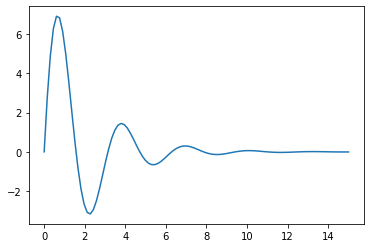

In [0]:
var('A tau omega') # priprava spremenljivk
f = Lambda((t,A,tau,omega),A*exp(-t/tau)*sin(omega*t)) 
display(f(t,A,tau,omega))

x = np.linspace(0,15,100)  # niz vrednosti za x-os - čas
A=10
tau=2
omega=2
plt.plot(x,[f(t,A, tau, omega) for t in x]) 
plt.show()

#### Rešitev druge naloge - izklop RC vezja

Diferencialna enačba je enaka kot v prvem primeru. Razlika je v začetnem pogoju.

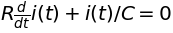

In [0]:
var('R C t C1 t0 Ug') # priprava spremenljivk
i = Function("i")(t) # funkcija toka

de = Eq(i/C+R*i.diff(t)) # zapis diferencialne enačbe
display(de) # izpis enačbe
des = dsolve(de,i) # rešitev enačbe
display(des) # izpis rešitve

Začetni pogoj izhaja iz $u_C(t=t_0^+)=u_C(t=t_0^-)$, ki pa ni enak nič, pač pa napetost na kondenzatorju tik pred izklopom, torej $u_C(t=t_0)=U_g$. Torej bo tok ob preklopu enak $i(t_0)=U_g/R$ ali bolje $i(t_0)=-U_g/R$, saj ima drugo smer (nasprotno)  kot pri polnenju kondenzatorja.

In [0]:
it0=des.args[1].subs({'t':t0}) # t zamenjamo za t0
display(it0)

eq_init = Eq(it0, -Ug/R)  # izrazimo enačbo pri t0: i(t0)=Ug/R
display(eq_init)

init_solve=solve(eq_init, C1) # rešimo enačbo za C1
display(init_solve)  # prikažemo rešitev

solution = des.subs(C1,init_solve[0]) # v rešitev vstavimo C1 in dobimo končno enačbo
display(simplify(solution))

In [0]:
zacetne_vrednosti = {t0:1,C:1e-6,Ug:3, R:1e6}
print(zacetne_vrednosti)
tok = lambdify(t,solution.args[1].subs(zacetne_vrednosti), 'numpy')  # tok kot funkcija časa
print('Tok pri 2 s: {:g} A'.format(tok(2))) # testiram

{t0: 1, C: 1e-06, Ug: 3, R: 1000000.0}
Tok pri 2 s: -1.10364e-06 A


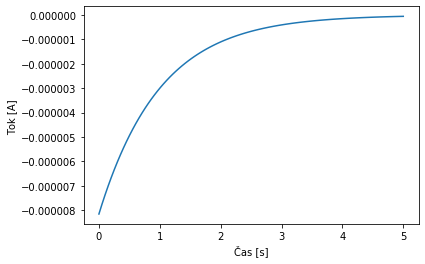

In [0]:
cas = np.linspace(0, 5, 100)
plt.plot(cas, tok(cas))
plt.xlabel('Čas [s]')
plt.ylabel('Tok [A] ')
plt.show()


#### Rešitev tretje enačbe - funkcija  $i(t)={I_0} e^{-t/\tau}$ 

Zapišem funkcijo in preverim delovanje v grafu z eno krivuljo

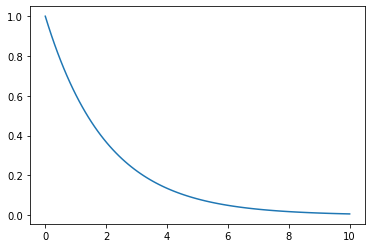

In [0]:
def it(t,a,b):  # funkcija
    return a*np.exp(-t/b)

cas=np.linspace(0,10,100)
tok=it(cas,1,2)
plt.plot(cas,tok)  # preverim za eno krivuljo

Naredim niz vrednosti tau ter zanko, v kateri se izriše več krivulj na grafu za izbrane vrednosti niza tau.

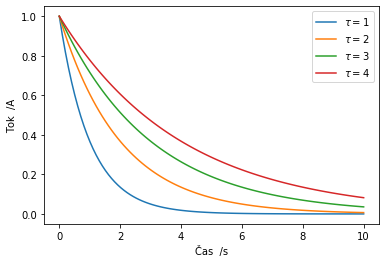

In [0]:
tau=[1,2,3,4] # niz vrednosti tau
for i in range(len(tau)):
  labela=r'$\tau = $'+str(tau[i])
  plt.plot(cas, it(cas,1,tau[i]),label=labela)
plt.xlabel('Čas  /s')
plt.ylabel('Tok  /A')
plt.legend()